#### Refernces 

https://machinelearningmastery.com/autoencoder-for-classification/

#### Load Toy data

In [1]:


# synthetic classification dataset
from sklearn.datasets import make_classification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import torch

# define dataset
n_features=100
n_data = 1000
X, Y = make_classification(n_samples=n_data, n_features=n_features, n_informative=10, n_redundant=90, random_state=1)


X = X.reshape(n_data,n_features)
Y = Y.reshape(n_data,1)

# summarize the dataset
print(X.shape, Y.shape)



# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# scale data
t = MinMaxScaler()
t.fit(X_train)
X_train = t.transform(X_train)
X_test  = t.transform(X_test)


train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))


batch_size = 16
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=len(test_data.tensors[0]))



(1000, 100) (1000, 1)


##### Define Autoencoder Network

In [2]:
from lib.models.autoencoderNN import AENN
from torch import nn

n_components = 10 # Reduced components

shape_encoder=[n_features, 2*n_features, n_features, n_components]
activation_function_encoder=nn.LeakyReLU()
shape_decoder=[n_components, n_features, 2*n_features, n_features] 
activation_function_decoder=nn.LeakyReLU()
activation_function_out=nn.Linear

model = AENN(shape_encoder,  activation_function_encoder, shape_decoder, activation_function_decoder,activation_function_out  )
#print(model)

if 0:
    for name, param in model.named_parameters():
        print(name)
        print(param)

    # Test Execution
    input = torch.tensor(X_train[0:2,:], dtype=torch.float32)
    out = model(input)



#### Train Model

In [3]:
import matplotlib.pyplot as plt

# Reset Model
model = AENN(shape_encoder,  activation_function_encoder, shape_decoder, activation_function_decoder  )
num_epochs = 100
epochs = range(num_epochs)

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

loss_function = nn.MSELoss() 

train_loss, test_loss = model.trainEpochs(train_loader, num_epochs, optimizer, loss_function, test_loader)





#### Plot Training Curve

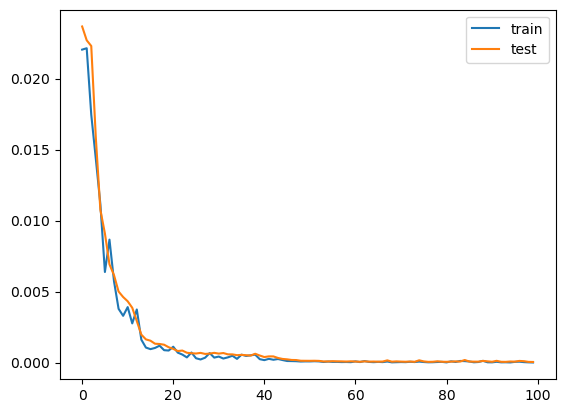

In [4]:
plt.plot(epochs, train_loss, label='train')
plt.plot(epochs, test_loss, label='test')
plt.legend()
plt.show()